In [1]:
import earthaccess

import geopandas as gpd
import rasters as rt

from EMITL2ARFL import *

date range

In [2]:
start_date = "2024-01-01"
end_date = "2024-12-31"

download directory

In [3]:
download_directory = "~/data/EMIT_download"

Upper Kings area of interest

In [4]:
gdf = gpd.read_file("upper_kings.kml")
gdf

,Name,Description,geometry
0,0,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-118.75179 36.85601 0, -118...."


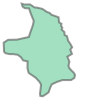

In [5]:
gdf.geometry[0]

In [6]:
bbox_UTM = rt.Polygon(gdf.unary_union).UTM.bbox
bbox_UTM

/var/folders/bv/410kt7f93x78j9dww00h1pz80000gn/T/ipykernel_73471/4116591760.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  bbox_UTM = rt.Polygon(gdf.unary_union).UTM.bbox


BBox(xmin=343776.99999338, ymin=4050631.999999944, xmax=381105.99999904167, ymax=4111651.9999999665, crs="EPSG:32611")

In [7]:
grid = rt.RasterGrid.from_bbox(bbox_UTM, cell_size=60, crs=bbox_UTM.crs)
grid

{
  "dimensions": {
    "rows": 1017,
    "cols": 622
  },
  "bbox": {
    "xmin": 343776.99999338,
    "ymin": 4050631.9999999665,
    "xmax": 381096.99999338,
    "ymax": 4111651.9999999665
  },
  "crs": "EPSG:32611",
  "resolution": {
    "cell_width": 60.0,
    "cell_height": -60.0
  }
}

Log into `earthaccess` using `netrc` credentials

In [8]:
earthaccess.login(strategy="netrc", persist=True)

In [9]:
search_results = search_EMIT_L2A_RFL_granules(
    start_UTC=start_date,
    end_UTC=end_date,
    geometry=grid
)

search_results

RuntimeError: {"errors":["An Internal Error has occurred."]}